### ***Kernals & Bluring***

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

**Reading the Image**

In [66]:
image = cv.imread(r"C:\Users\moham\OneDrive\Pictures\Saved Pictures\a115cca0b6bd8fb87366f1d904330c68.jpg")
image_rgb = cv.cvtColor(image , cv.COLOR_BGR2RGB)

**Kernal(horizontal , Vertical)**

Text(0.5, 1.0, 'Horizontal image')

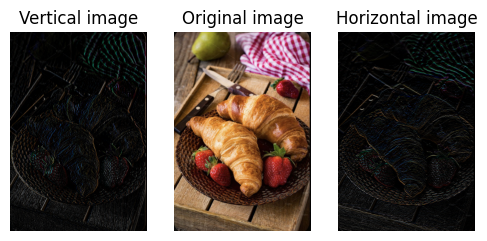

In [68]:
kernal = np.array([
    [1 , 0 , -1],
    [1 , 0 , -1],
    [1 , 0 , -1]
])

kernal2 = kernal.T

mod_img = cv.filter2D(image_rgb , -1 ,kernal)
mod_img_hor = cv.filter2D(image_rgb , -1 ,kernal2)

plt.figure(figsize=(6 , 6))
plt.subplot(131)
plt.imshow(mod_img)
plt.axis('off')
plt.title('Vertical image')

plt.subplot(132)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original image')

plt.subplot(133)
plt.imshow(mod_img_hor)
plt.axis('off')
plt.title('Horizontal image')

### **Bluring**

Text(0.5, 1.0, 'Original image')

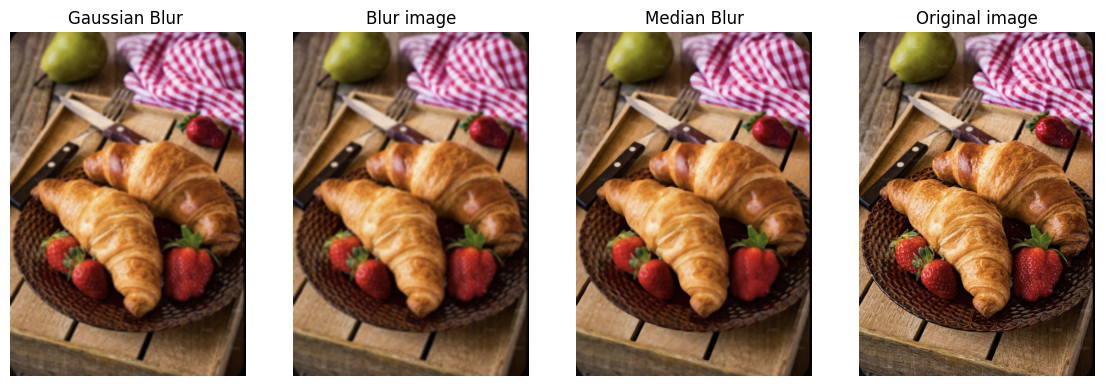

In [70]:
#Gaussian Blur center has the heighst value (out of focus) 
gauss_blur = cv.GaussianBlur(image_rgb , (15 ,15), 5) #(0) is the center 
image_blr = cv.blur(image_rgb , (15 ,15))
image_median = cv.medianBlur(image_rgb ,15)

plt.figure(figsize=(14 , 6))
plt.subplot(141)
plt.imshow(gauss_blur)
plt.axis('off')
plt.title('Gaussian Blur ')

plt.subplot(142)
plt.imshow(image_blr)
plt.axis('off')
plt.title('Blur image')

plt.subplot(143)
plt.imshow(image_median)
plt.axis('off')
plt.title('Median Blur')

plt.subplot(144)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original image')


### ***Edge detection filters***
1. laplacian 
2. canny
3. sobel 

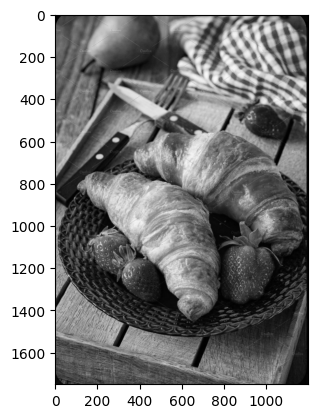

In [71]:
gray = cv.cvtColor(image , cv.COLOR_BGR2GRAY)
plt.imshow(gray , cmap='gray')

## ***SOBEL FILTERS***
Q) concept of gradients and directions ?

In [ ]:
image = cv.imread(r"C:\Users\moham\OneDrive\Pictures\Saved Pictures\1ed11d52e28ca3c70634a5e38132efcd.jpg")
gray = cv.cvtColor(image , cv.COLOR_BGR2GRAY )

(-0.5, 499.5, 496.5, -0.5)

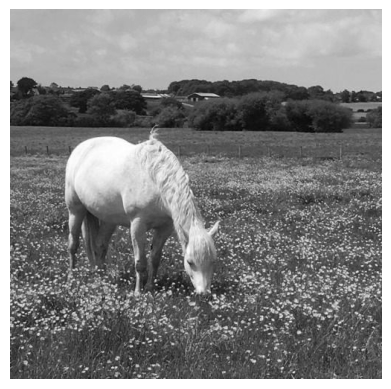

In [73]:
plt.imshow(gray , cmap='gray')
plt.axis('off')

Text(0.5, 1.0, 'Original gray')

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\image.py:492: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


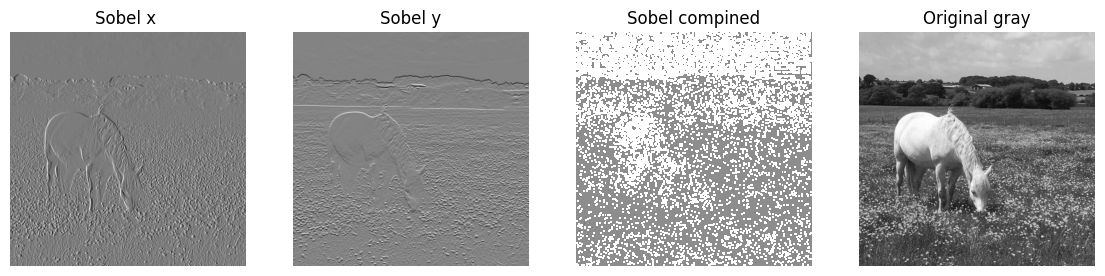

In [74]:
sobelx = cv.Sobel(gray , cv.CV_64F , 1 , 0  , ksize=3)
sobely = cv.Sobel(gray , cv.CV_64F  , 0 , 1 ,ksize=3)
sobel_combined = cv.bitwise_or(sobelx , sobely)


plt.figure(figsize=(14 , 6))
plt.subplot(141)
plt.imshow(sobelx, cmap='gray')
plt.axis('off')
plt.title('Sobel x ')

plt.subplot(142)
plt.imshow(sobely , cmap='gray')
plt.axis('off')
plt.title('Sobel y')

plt.subplot(143)
plt.imshow(sobel_combined , cmap='gray')
plt.axis('off')
plt.title('Sobel compined')

plt.subplot(144)
plt.imshow(gray , cmap='gray')
plt.axis('off')
plt.title('Original gray')

### ***how to make a padding***
Q) why odd filters are better than the even ones ?

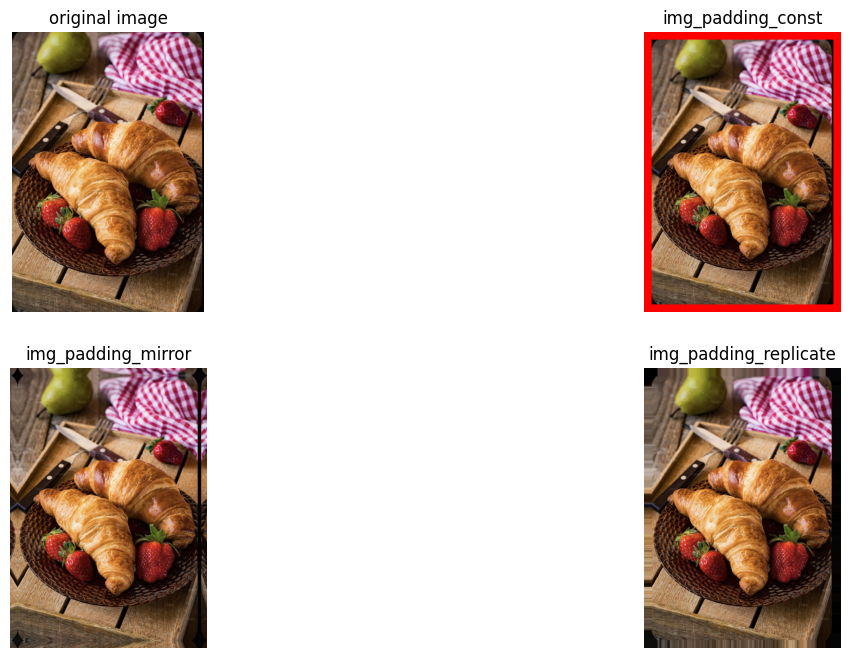

In [75]:
#concept of odd kernals => 1- preserve center 
padding_images ={
'original image' : image_rgb , #will fill the padding with a constant remember MATPLOTLIB.PYPLOT dealing with -> RGB not BGR 
'img_padding_const' : cv.copyMakeBorder(image_rgb , 50 , 50 , 50 , 50 ,cv.BORDER_CONSTANT , value=[255 , 0 , 0]) ,
'img_padding_mirror' : cv.copyMakeBorder(image_rgb , 50 , 50 , 50 , 50 ,cv.BORDER_REFLECT) ,
'img_padding_replicate' : cv.copyMakeBorder(image_rgb , 50 , 50 , 50 , 50 ,cv.BORDER_REPLICATE)
}


plt.figure(figsize=(15 , 8))

for i  , (title , img) in enumerate(padding_images.items() , start=1):
    plt.subplot(2 ,2 ,i)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

